In [1]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Print the column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:
# Get the dimensions of the DataFrame
rows, cols = mcdonalds.shape
print("Number of rows:", rows)
print("Number of columns:", cols)


Number of rows: 1453
Number of columns: 15


In [4]:
# Display the first 3 rows of the DataFrame
mcdonalds.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
import pandas as pd
import numpy as np


# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" values to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:
from sklearn.decomposition import PCA



# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)


print("Standard deviation of each principal component:", pca.explained_variance_)
print("Proportion of variance explained by each component:", pca.explained_variance_ratio_)
print("Cumulative proportion of variance explained:", np.cumsum(pca.explained_variance_ratio_))


Standard deviation of each principal component: [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of variance explained by each component: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative proportion of variance explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [8]:


# Print the transformed matrix
print(np.round(MD_pca, 1))


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


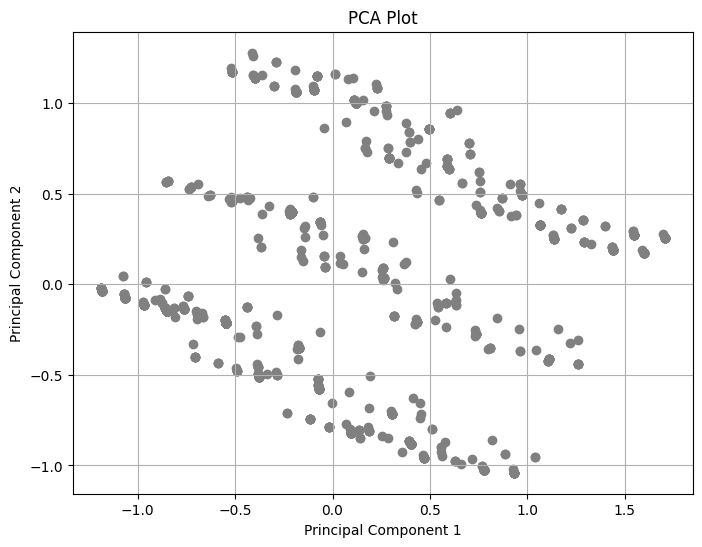

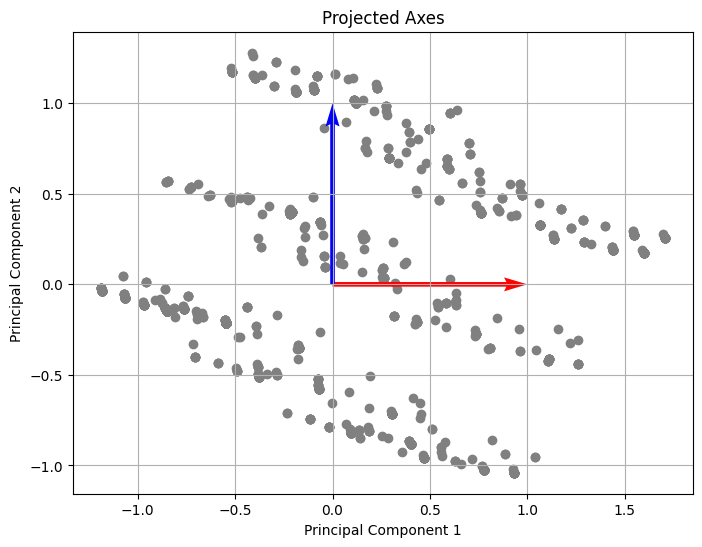

In [9]:
import matplotlib.pyplot as plt



# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()

# Visualize projected axes
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Axes')
plt.grid(True)
plt.show()


In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed
np.random.seed(1234)



# Initialize variables to store results
best_k = None
best_kmeans = None
best_score = float('inf')

# Perform K-means clustering for different number of clusters
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    score = kmeans.inertia_
    if score < best_score:
        best_k = k
        best_kmeans = kmeans
        best_score = score

# Relabel clusters
cluster_labels = best_kmeans.labels_

# Display the best K and the cluster labels
print("Best number of clusters (K):", best_k)
print("Cluster labels:", cluster_labels)


Best number of clusters (K): 8
Cluster labels: [4 2 5 ... 5 3 0]


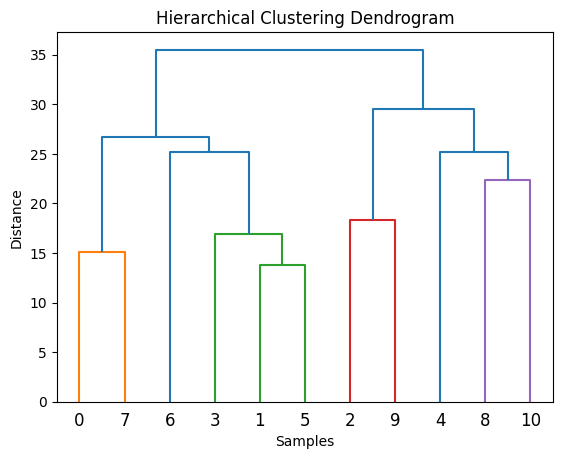

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np



# Compute the distance matrix
distance_matrix = np.transpose(MD_x)
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


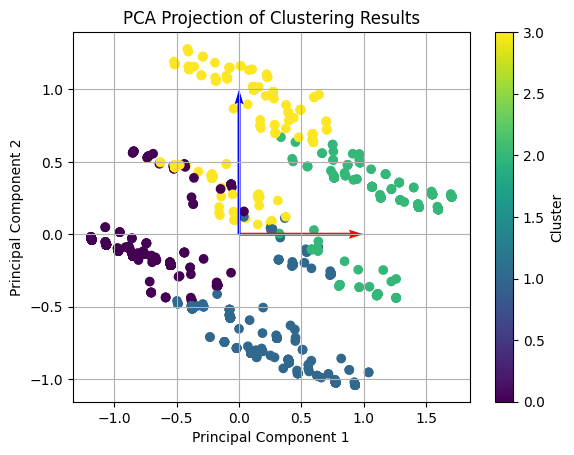

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
labels = kmeans.fit_predict(MD_x)

# Plot the clustering results with PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Clustering Results')
plt.colorbar(label='Cluster')
plt.grid(True)

# Plot the projected axes
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='b')

plt.show()
